In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
occupancy_data = pd.read_csv('Occupancy Data 2.csv')
occupancy_data

,ID_Date,Temperature,Humidity,Light,CO2,HumidityRatio,OccupancyDetection
0,1,21.76,31.13,437.33,1029.67,0.005021,Occupied
1,2,21.79,31.00,437.33,1000.00,0.005009,Occupied
2,3,21.77,31.12,434.00,1003.75,0.005022,Occupied
3,4,21.77,31.12,439.00,1009.50,0.005022,Occupied
4,5,21.79,31.13,437.33,1005.67,0.005030,Occupied
...,...,...,...,...,...,...,...
9747,9748,20.82,27.72,429.75,1505.25,0.004213,Occupied
9748,9749,20.87,27.75,423.50,1514.50,0.004230,Occupied
9749,9750,20.89,27.75,423.50,1521.50,0.004237,Occupied
9750,9751,20.89,28.02,418.75,1632.00,0.004279,Occupied


In [ ]:
occupancy_data['OccupancyDetection']=occupancy_data['OccupancyDetection'].replace(['Not Occupied', 'Occupied'],[0,1])

occupancy_data

,ID_Date,Temperature,Humidity,Light,CO2,HumidityRatio,OccupancyDetection
0,1,21.76,31.13,437.33,1029.67,0.005021,1
1,2,21.79,31.00,437.33,1000.00,0.005009,1
2,3,21.77,31.12,434.00,1003.75,0.005022,1
3,4,21.77,31.12,439.00,1009.50,0.005022,1
4,5,21.79,31.13,437.33,1005.67,0.005030,1
...,...,...,...,...,...,...,...
9747,9748,20.82,27.72,429.75,1505.25,0.004213,1
9748,9749,20.87,27.75,423.50,1514.50,0.004230,1
9749,9750,20.89,27.75,423.50,1521.50,0.004237,1
9750,9751,20.89,28.02,418.75,1632.00,0.004279,1


In [ ]:
occupancy_data.head()

,ID_Date,Temperature,Humidity,Light,CO2,HumidityRatio,OccupancyDetection
0,1,21.76,31.13,437.33,1029.67,0.005021,1
1,2,21.79,31.00,437.33,1000.00,0.005009,1
2,3,21.77,31.12,434.00,1003.75,0.005022,1
3,4,21.77,31.12,439.00,1009.50,0.005022,1
4,5,21.79,31.13,437.33,1005.67,0.005030,1


In [ ]:
occupancy_data.tail()

,ID_Date,Temperature,Humidity,Light,CO2,HumidityRatio,OccupancyDetection
9747,9748,20.82,27.72,429.75,1505.25,0.004213,1
9748,9749,20.87,27.75,423.50,1514.50,0.004230,1
9749,9750,20.89,27.75,423.50,1521.50,0.004237,1
9750,9751,20.89,28.02,418.75,1632.00,0.004279,1
9751,9752,21.00,28.10,409.00,1864.00,0.004321,1


In [ ]:
occupancy_data.describe()

,ID_Date,Temperature,Humidity,Light,CO2,HumidityRatio,OccupancyDetection
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,4876.500000,21.002133,29.892659,123.067922,753.224820,0.004589,0.210111
std,2815.304246,1.020825,3.952732,208.221273,297.096118,0.000531,0.407408
min,1.000000,19.500000,21.870000,0.000000,484.670000,0.003275,0.000000
25%,2438.750000,20.290000,26.645000,0.000000,542.310000,0.004196,0.000000
50%,4876.500000,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,7314.250000,21.530000,32.700000,208.250000,831.125000,0.004998,0.000000
max,9752.000000,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [ ]:
occupancy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Date             9752 non-null   int64  
 1   Temperature         9752 non-null   float64
 2   Humidity            9752 non-null   float64
 3   Light               9752 non-null   float64
 4   CO2                 9752 non-null   float64
 5   HumidityRatio       9752 non-null   float64
 6   OccupancyDetection  9752 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 533.4 KB


In [ ]:
occupancy_data.shape

(9752, 7)

In [ ]:
occupancy_data['OccupancyDetection'].value_counts()

0    7703
1    2049
Name: OccupancyDetection, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


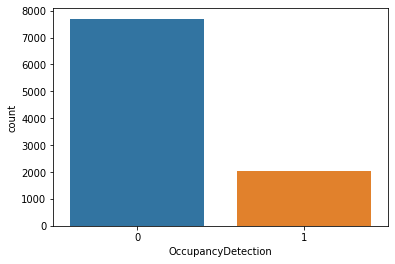

In [ ]:
sns.countplot(occupancy_data['OccupancyDetection'])

In [ ]:
%pip install imblearn
import imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X = occupancy_data.drop('OccupancyDetection',axis=1)
y = occupancy_data['OccupancyDetection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=99)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

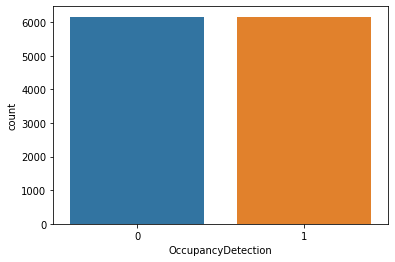

In [ ]:
from imblearn.over_sampling import RandomOverSampler

resampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_oversampled)

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(64, activation='relu',input_shape=(6,)))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 578
Trainable params: 578
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=200,
    validation_split=0.2)

Fit model on training data
Epoch 1/200
98/98 [==============================] - 1s 6ms/step - loss: 0.3041 - accuracy: 0.9258 - val_loss: 0.1243 - val_accuracy: 0.9801
Epoch 2/200
98/98 [==============================] - 0s 2ms/step - loss: 0.0937 - accuracy: 0.9795 - val_loss: 0.0587 - val_accuracy: 0.9898
Epoch 3/200
98/98 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9872 - val_loss: 0.0407 - val_accuracy: 0.9923
Epoch 4/200
98/98 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.9904 - val_loss: 0.0344 - val_accuracy: 0.9930
Epoch 5/200
98/98 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 0.9913 - val_loss: 0.0313 - val_accuracy: 0.9930
Epoch 6/200
98/98 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9918 - val_loss: 0.0300 - val_accuracy: 0.9930
Epoch 7/200
98/98 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9923 - val_loss: 0.0282 - val_acc

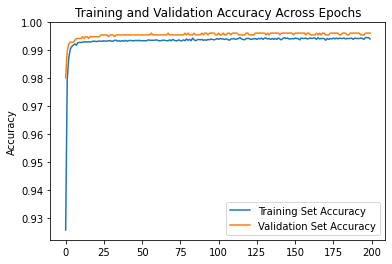

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

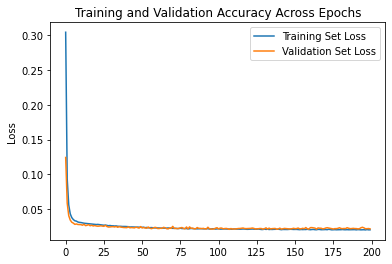

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

61/61 [==============================] - 0s 1ms/step


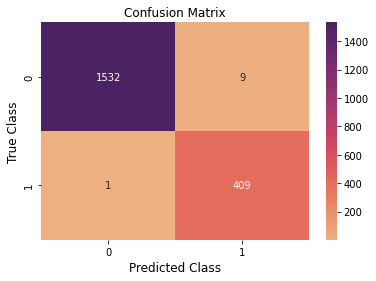

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')


plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1541
           1       0.98      1.00      0.99       410

    accuracy                           0.99      1951
   macro avg       0.99      1.00      0.99      1951
weighted avg       0.99      0.99      0.99      1951

